In [1]:
import pandas as pd#EDA
import numpy as np#
import matplotlib.pyplot as plt
import sklearn
import scipy as sp
%matplotlib inline

In [2]:
!pip install version_information

  Running setup.py bdist_wheel for version-information: started
  Running setup.py bdist_wheel for version-information: finished with status 'done'
  Stored in directory: C:\Users\Nitesh\AppData\Local\pip\Cache\wheels\4b\4c\f7\4d99d7820a507d8ae55204fcc00d66cdabf596d4b01228e7bd
Successfully built version-information


You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
!python -m pip install --upgrade pip

  Found existing installation: pip 8.1.2
    Uninstalling pip-8.1.2:
      Successfully uninstalled pip-8.1.2


In [6]:
%load_ext version_information
%version_information pandas, numpy, matplotlib, sklearn

Software versions
Python 2.7.12 64bit [MSC v.1500 64 bit (AMD64)]
IPython 5.1.0
OS Windows 10 10.0.14393
pandas 0.18.1
numpy 1.11.3
matplotlib 1.5.3
sklearn 0.18.1
Thu Feb 23 19:28:34 2017 Pacific Standard Time

In [2]:
#lets import train data
df=pd.read_csv("data/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.describe()

C:\Program Files\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [5]:
#train["Survived"].groupby(train["Survived"]).count()
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

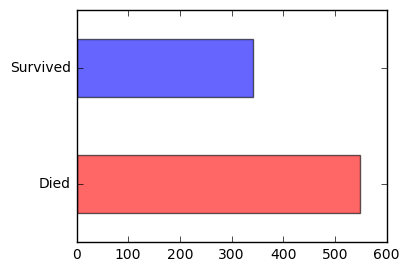

In [6]:
fig=plt.figure(figsize=(4,3))
ax=fig.add_subplot()
ax=df.Survived.value_counts().plot(kind='barh',color=['red','blue'],alpha=0.6)
ax.set_yticklabels(["Died","Survived"])

plt.show()

In [7]:
#let's explore Survived/Died based on features like Pclass,Sex, Age,Fare
male_surv=df.Survived[df.Survived==1][df.Sex=='male'].value_counts()
males=df.Survived[df.Sex=='male'].value_counts()
print(male_surv)

female_surv=df.Survived[df.Survived==1][df.Sex=='female'].value_counts()
females=df.Survived[df.Sex=='female'].value_counts()
print(female_surv)

1    109
Name: Survived, dtype: int64
1    233
Name: Survived, dtype: int64


3    47
1    45
2    17
Name: Pclass, dtype: int64
1    91
3    72
2    70
Name: Pclass, dtype: int64
3    300
2     91
1     77
Name: Pclass, dtype: int64
3    72
2     6
1     3
Name: Pclass, dtype: int64


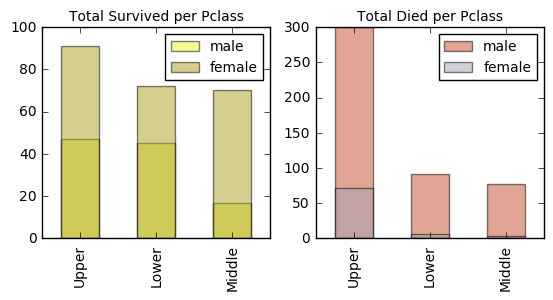

In [8]:
male_surv_pclass=df.Pclass[df.Survived==1][df.Sex=='male'].value_counts()
print(male_surv_pclass)

female_surv_pclass=df.Pclass[df.Survived==1][df.Sex=='female'].value_counts()
print(female_surv_pclass)

fig=plt.figure(figsize=(10,6))
#ax1=fig.add_subplot(345)
ax1=plt.subplot2grid((2,3),(0,0))
male_surv_pclass.plot(kind='bar',alpha=0.5,color='#eff123',label='male')
female_surv_pclass.plot(kind='bar',alpha=0.5,color='#aaa121',label='female')
ax1.set_xticklabels(['Upper','Lower','Middle'])
plt.legend(loc='best',prop={'size':10})
plt.title('Total Survived per Pclass',fontsize=10)


male_died_pclass=df.Pclass[df.Survived==0][df.Sex=='male'].value_counts()
print(male_died_pclass)

female_died_pclass=df.Pclass[df.Survived==0][df.Sex=='female'].value_counts()
print(female_died_pclass)


#ax=fig.add_subplot(346,sharey=ax1)
ax2=plt.subplot2grid((2,3),(0,1))
male_died_pclass.plot(kind='bar',alpha=0.5,color='#c44d2e',label='male')
female_died_pclass.plot(kind='bar',alpha=0.5,color='#a3a2b2',label='female')
ax2.set_xticklabels(['Upper','Lower','Middle'])
plt.legend(loc='best',prop={'size':10})
plt.title('Total Died per Pclass',fontsize=10)

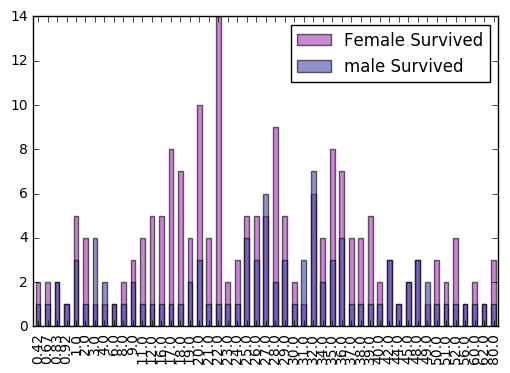

In [9]:
df.Age[df.Survived==1][df.Sex=='female'].value_counts().sort_index().plot.bar(color='#aa33bb',alpha=0.6,label='Female Survived')

df.Age[df.Survived==1][df.Sex=='male'].value_counts().sort_index().plot.bar(color='#454aab',alpha=0.6,label='male Survived')

plt.legend(loc='best')


In [10]:

#print(df.groupby('SibSp').SibSp.count())
#print(df.groupby('Parch').Parch.count())

print(df.SibSp.value_counts())
print(df.Parch.value_counts())

print(df.SibSp[df.Survived==1][df.SibSp!=0].count())
print(df.SibSp[df.Survived==1][df.Parch!=0].count())

print(df.SibSp[df.Survived==1][df.Sex=='male'][df.SibSp!=0].count())
print(df.Parch[df.Survived==1][df.Sex=='male'][df.Parch!=0].count())

print(df.SibSp[df.Survived==1][df.Sex=='female'][df.SibSp!=0].count())
print(df.Parch[df.Survived==1][df.Sex=='female'][df.Parch!=0].count())



0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
132
109
36
29
96
80


In [11]:
df.Embarked.unique()
df.Embarked=df.Embarked.fillna('S')
print(df.groupby('Embarked').Embarked.count())

Embarked
C    168
Q     77
S    646
Name: Embarked, dtype: int64


In [12]:
print(df.Embarked[df.Survived==1][df.Embarked=='S'].value_counts())
print(df.Survived[df.Survived==1][df.Embarked=='C'].value_counts())
print(df.Survived[df.Survived==1][df.Embarked=='Q'].value_counts())

S    219
Name: Embarked, dtype: int64
1    93
Name: Survived, dtype: int64
1    30
Name: Survived, dtype: int64


## Lets Update the data

In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
df[df.Sex=='male'][df.Age.isnull()]

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C
45,46,0,3,"Rogers, Mr. William John",male,NaN,0,0,S.C./A.4. 23567,8.0500,NaN,S
46,47,0,3,"Lennon, Mr. Denis",male,NaN,1,0,370371,15.5000,NaN,Q
48,49,0,3,"Samaan, Mr. Youssef",male,NaN,2,0,2662,21.6792,NaN,C
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S


In [57]:
#how to see like, IN operator in python,R
x=df.Name[df.Sex=='male'][df.Age.isnull()].str.split().str.get(1)
type(x)
x


5             Mr.
17            Mr.
26            Mr.
29            Mr.
36            Mr.
42            Mr.
45            Mr.
46            Mr.
48            Mr.
55            Mr.
64            Mr.
65        Master.
76            Mr.
77            Mr.
87            Mr.
95            Mr.
101           Mr.
107           Mr.
121           Mr.
126           Mr.
154           Mr.
158           Mr.
159       Master.
168           Mr.
176       Master.
181           Mr.
185           Mr.
196           Mr.
201           Mr.
214           Mr.
          ...    
667           Mr.
674           Mr.
692           Mr.
709       Master.
711           Mr.
718           Mr.
732           Mr.
738           Mr.
739           Mr.
740           Mr.
760           Mr.
766           Dr.
768           Mr.
773           Mr.
776           Mr.
778           Mr.
783           Mr.
790           Mr.
793           Mr.
815           Mr.
825           Mr.
826           Mr.
828           Mr.
832           Mr.
837       

In [62]:
df.Age[df.Age > 18][df.Sex=='male'].mean()
df.Age[df.Age < 18][df.Sex=='male'].mean()

df.Age[df.Age > 18][df.Sex=='female'].mean()
df.Age[df.Age < 18][df.Sex=='female'].mean()

9.236363636363636

In [70]:
# find name in master, sibsp >0 parch > 0 /*
df[df.Sex=='male'][df.Age < 18][df.SibSp > 0][df.Parch > 0]

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q
50,51,0,3,"Panula, Master. Juha Niilo",male,7.00,4,1,3101295,39.6875,NaN,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.00,5,2,CA 2144,46.9000,NaN,S
63,64,0,3,"Skoog, Master. Harald",male,4.00,3,2,347088,27.9000,NaN,S
86,87,0,3,"Ford, Mr. William Neal",male,16.00,1,3,W./C. 6608,34.3750,NaN,S
164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,NaN,S
171,172,0,3,"Rice, Master. Arthur",male,4.00,4,1,382652,29.1250,NaN,Q
182,183,0,3,"Asplund, Master. Clarence Gustaf Hugo",male,9.00,4,2,347077,31.3875,NaN,S
183,184,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,F4,S


In [109]:
df.Age_group=None
df.Age_group[df.Age <= 10]=0 #'<10'
df.Age_group[(df.Age > 10) & (df.Age <21)]=1 #'<21'
df.Age_group[df.Age > 21]=2 #'>21'
# df.loc[df['Age'] <= 10,'Age_group']= '<10'
# df.loc[(df['Age'] > 10) ]
df

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,None
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,2
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


In [82]:
def age_grp(df):
    
    if[df.Age <= 10]:
        df.Age_group=0
    elif[df.Age <= 21]:
        df.Age_group=1
    elif[df.Age > 21]:
        df.Age_group=2
    
df=df.assign(Age_group=df.apply(age_grp,axis=1))

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,None
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,None
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,None
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,None
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,None


# # can we convert Age into kids, young,adults?
sibsp > 3 survived is less?

In [44]:
x=df.Name[df.Sex=='female'][df.Age.isnull()].str.split().str.get(1).value_counts()
type(x)
x

Miss.    36
Mrs.     17
Name: Name, dtype: int64

In [14]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       891
dtype: int64

In [20]:
#lets fill the age for the missing records with mean age
df.Age=df.Age.fillna(df.Age.mean())

In [21]:
#convert char var to categorical

# 0='male 1='female'
df.loc[df.Sex=="male","Sex"]=0
df.loc[df.Sex=="female","Sex"]=1

# 0='S' 1='C' 2='Q'
df.loc[df.Embarked=='S',"Embarked"]=0
df.loc[df.Embarked=='C',"Embarked"]=1
df.loc[df.Embarked=='Q',"Embarked"]=2


df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


In [22]:
df.Cabin.isnull().value_counts()

True     687
False    204
Name: Cabin, dtype: int64

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import KFold

predictors=['Pclass','Sex','Age','Fare','Embarked']

model=LinearRegression()

kf=KFold(df.shape[0],n_folds=3,random_state=1)

predictions=[]

for train,test in kf:
    train_predictors=(df[predictors].iloc[train,:])
    train_target=df["Survived"].iloc[train]
    
    model.fit(train_predictors,train_target)
    test_predictions=model.predict(df[predictors].iloc[test,:])
    predictions.append(test_predictions)
    print(predictions)


[array([ 0.09677156,  0.96650753,  0.54254796,  0.92820685,  0.03297939,
        0.16371057,  0.36949308,  0.19547893,  0.53775907,  0.86871179,
        0.65088443,  0.81429327,  0.10662042,  0.01421422,  0.60145812,
        0.6145519 ,  0.30047301,  0.27326276,  0.51837941,  0.57670705,
        0.24772694,  0.252148  ,  0.70124698,  0.49652288,  0.63141116,
        0.48451649,  0.1113184 ,  0.54925343,  0.62907747,  0.05899776,
        0.48966368,  1.01008616,  0.62907261,  0.09495323,  0.55062189,
        0.42841107,  0.11131856,  0.10171101,  0.58220163,  0.65393121,
        0.47387455,  0.75220298,  0.1113436 ,  0.92314751,  0.68160374,
        0.05900355,  0.16397509,  0.62907261,  0.11186137,  0.58219412,
        0.17163109,  0.10170162,  0.91270868,  0.742572  ,  0.36821553,
        0.48818123,  0.78126496,  0.11720551,  0.86046338,  0.15226442,
        0.14911662,  0.91448913,  0.4148652 ,  0.1859165 ,  0.54023485,
        0.1116197 ,  0.74198975,  0.11153389,  0.58673257,  0.0

C:\Program Files\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [24]:
predictions=np.concatenate(predictions,axis=0)
predictions[predictions <= .5]=0
predictions[predictions > .5]=1
accuracy=sum(predictions[predictions==df["Survived"]])/len(predictions)
predictions.tofile("result",sep=',')
print accuracy
print predictions

0.7822671156
[ 0.  1.  1.  1.  0.  0.  0.  0.  1.  1.  1.  1.  0.  0.  1.  1.  0.  0.
  1.  1.  0.  0.  1.  0.  1.  0.  0.  1.  1.  0.  0.  1.  1.  0.  1.  0.
  0.  0.  1.  1.  0.  1.  0.  1.  1.  0.  0.  1.  0.  1.  0.  0.  1.  1.
  0.  0.  1.  0.  1.  0.  0.  1.  0.  0.  1.  0.  1.  0.  1.  0.  0.  1.
  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  1.  1.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  1.  0.  1.  0.  0.  0.  1.  0.
  0.  1.  0.  1.  0.  1.  1.  0.  0.  0.  1.  1.  0.  0.  0.  1.  0.  0.
  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  1.  1.  1.  1.  0.
  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.
  1.  0.  0.  0.  1.  0.  1.  0.  0.  0.  1.  0.  1.  0.  1.  1.  0.  0.
  1.  1.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  1.  0.  0.  0.  1.
  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  1.
  0.  1.  0.  1.  0.  0.  1.  1.  0.  

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


In [29]:
#Logistic Regression
from sklearn import cross_validation as cv
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=1)
scores=cv.cross_val_score(model,df[predictors],df["Survived"],cv=3)
#scores=cv.cross_val_score(model,df_test[predictors],submit["Survived"],cv=3)
print scores.mean()

0.791245791246


In [30]:
df_test=pd.read_csv('data/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [31]:
df_test.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

In [32]:
#updating the test data
df_test.Age=df_test.Age.fillna(df.Age.mean())

df_test.loc[df_test.Sex=='male','Sex']=0
df_test.loc[df_test.Sex=='female','Sex']=1

df_test.Embarked=df_test.Embarked.fillna('S')
df_test.loc[df_test.Embarked=='S','Embarked']=0
df_test.loc[df_test.Embarked=='C','Embarked']=1
df_test.loc[df_test.Embarked=='Q','Embarked']=2
df_test.Fare=df_test.Fare.fillna(df_test.Fare.mean())

df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0


In [33]:
df_test.Fare[ df_test.Fare < 20][df_test.Fare > 10].count()

82

In [34]:
model=LogisticRegression(random_state=1)
model.fit(df[predictors],df["Survived"])

predictions=model.predict(df_test[predictors])

submit=pd.DataFrame({'PassengerId':df_test["PassengerId"],'Survived':predictions})
submit.to_csv('data/output/output.csv',index=False)
submit
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [35]:
from sklearn import svm


In [ ]:
model=svm.SVC(kernel='poly',C=1,gamma=3)
model.fit(df[predictors],df["Survived"])
predictions=model.predict(df_test[predictors])
submit=pd.DataFrame({'PassengerId':df_test["PassengerId"],'Survived':predictions})
submit.to_csv('data/output/output_svm.csv',index=False)
submit
acc_svc = round(model.score(df[predictors],df["Survived"]) * 100, 2)
acc_svcN

In [ ]:
fig = plt.figure()
  
ax1 = plt.subplot2grid((2, 3), (0, 0))
ax2 = plt.subplot2grid((2, 3), (0, 1))
#ax3 = plt.subplot2grid((3, 3), (1, 0), colspan=2, rowspan=2)
#ax4 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)

reference :
https://github.com/agconti/kaggle-titanic/blob/master/Titanic.ipynb


https://www.dataquest.io/